# 11. Local Features - Matching

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def display_image(img, title=""):
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

Detect the keypoints in two different images (ex: with different scales, taken from different viewpoints, ...) and draw
the found matches, like in figure 3. Try different sets of images, keypoint detectors, matchers and visualization of the
matches:
 - SIFT or ORB for keypoint detection;
 -  Brute Force or FLANN for matching, with the alternatives match() or KnnMatch();
 - choose an appropriate distance measure;
 - drawMatches() (match()) or drawMatchesKnn() (KnnMatch()) for displaying the results

Starting with ORB and Brute Force

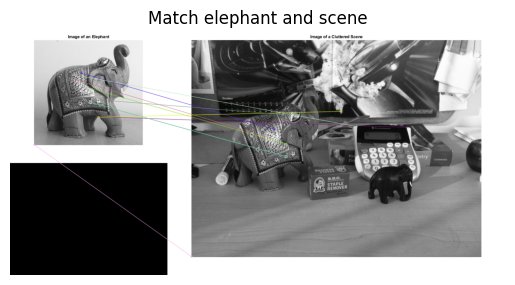

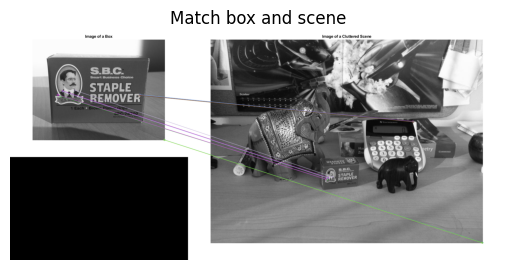

In [2]:
PATH_ELEPHANT = "../../images/match_scene01_2.png"
PATH_BOX = "../../images/match_scene01_1.png"
PATH_SCENE = "../../images/match_scene01_3.png"

image_elephant = cv2.imread(PATH_ELEPHANT, cv2.IMREAD_GRAYSCALE)
image_box = cv2.imread(PATH_BOX, cv2.IMREAD_GRAYSCALE)
image_scene = cv2.imread(PATH_SCENE, cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

kp_elephant, des_elephant = orb.detectAndCompute(image_elephant, None)
kp_box, des_box = orb.detectAndCompute(image_box, None)
kp_scene, des_scene = orb.detectAndCompute(image_scene, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des_elephant, des_scene)
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(
    image_elephant,
    kp_elephant,
    image_scene,
    kp_scene,
    matches[:10],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

display_image(img3, "Match elephant and scene")

# Match descriptors.
matches = bf.match(des_box, des_scene)
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(
    image_box,
    kp_box,
    image_scene,
    kp_scene,
    matches[:10],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)


display_image(img3, "Match box and scene")

Brute-Force Matching with SIFT Descriptors and Ratio Test

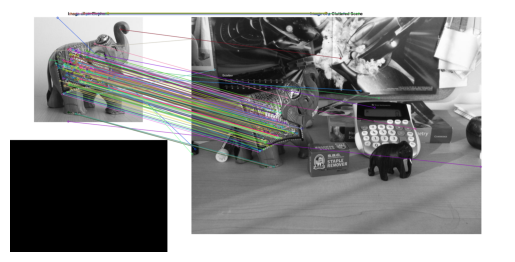

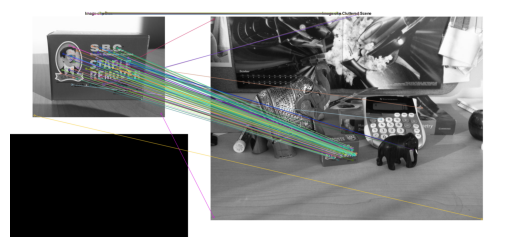

In [4]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image_elephant, None)
kp2, des2 = sift.detectAndCompute(image_scene, None)
kp3, des3 = sift.detectAndCompute(image_box, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(
    image_elephant,
    kp1,
    image_scene,
    kp2,
    good,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

display_image(img3)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des3, des2, k=2)
# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(
    image_box,
    kp3,
    image_scene,
    kp2,
    good,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

display_image(img3)

FLANN based Matcher

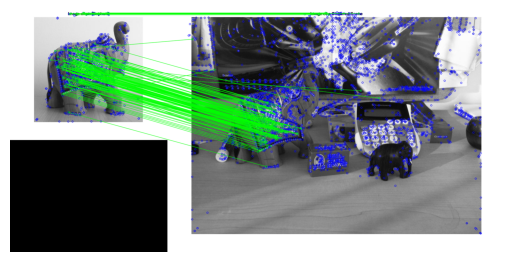

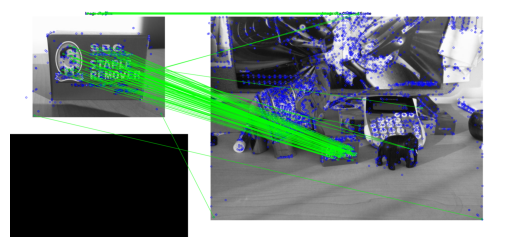

In [6]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image_elephant, None)
kp2, des2 = sift.detectAndCompute(image_scene, None)
kp3, des3 = sift.detectAndCompute(image_box, None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for _ in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]
draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matchesMask,
    flags=cv2.DrawMatchesFlags_DEFAULT,
)
img3 = cv2.drawMatchesKnn(image_elephant, kp1, image_scene, kp2, matches, None, **draw_params)

display_image(img3)

matches = flann.knnMatch(des3, des2, k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for _ in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]
draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matchesMask,
    flags=cv2.DrawMatchesFlags_DEFAULT,
)
img3 = cv2.drawMatchesKnn(image_box, kp3, image_scene, kp2, matches, None, **draw_params)

display_image(img3)